In [1]:
from dotenv import load_dotenv
import os
import requests
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np

In [2]:
load_dotenv('api.env')

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
alpaca = tradeapi.REST(
    alpaca_api_key,alpaca_secret_key,
    api_version="v2")

In [6]:
**For low risk tolerance**
#For low risk tolerance we the SPY - It is an index, well diversified across multiple sectors

SyntaxError: invalid syntax (519338569.py, line 1)

In [7]:
symbol='SPY'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()

In [8]:
from finta import TA
historical_data = alpaca.get_bars(symbol, timeframe, start=start_date).df
historical_data['delta']=historical_data['close'].diff()
historical_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.24,209.30,30375,82,209.322606,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.07,209.36,54490,118,209.214253,0.06
2015-12-01 11:00:00+00:00,209.37,209.6500,209.37,209.44,44404,109,209.526441,0.08
2015-12-01 12:00:00+00:00,209.45,209.5900,209.33,209.51,111106,234,209.460429,0.07
2015-12-01 13:00:00+00:00,209.52,209.6700,209.27,209.32,426233,645,209.429479,-0.19
...,...,...,...,...,...,...,...,...
2023-03-28 20:00:00+00:00,395.65,396.2499,395.60,396.18,7386748,5749,395.897111,0.53
2023-03-28 21:00:00+00:00,396.19,396.3100,396.17,396.27,86451,573,396.198185,0.09
2023-03-28 22:00:00+00:00,396.26,396.4100,395.60,396.27,157676,725,396.339178,0.00


**For high risk tolerance**
# We are Eastside Brewery - it a penny stock and has potential for massive upside


In [9]:
symbol='EAST'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
east_data= alpaca.get_bars(symbol, timeframe, start=start_date).df
east_data['delta']=east_data['close'].diff()
east_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2017-08-10 13:00:00+00:00,4.350000,4.3500,3.450000,3.500000,70776,196,3.673256,NaN
2017-08-10 14:00:00+00:00,3.500000,3.6000,3.350100,3.400000,41341,175,3.480739,-0.100000
2017-08-10 15:00:00+00:00,3.480000,3.5175,3.410000,3.510000,16624,104,3.495431,0.110000
2017-08-10 16:00:00+00:00,3.510000,3.5900,3.450000,3.490000,19577,67,3.505403,-0.020000
2017-08-10 17:00:00+00:00,3.490000,3.5500,3.480000,3.500000,15151,62,3.489088,0.010000
...,...,...,...,...,...,...,...,...
2023-03-28 17:00:00+00:00,0.269900,0.2700,0.269900,0.269999,900,3,0.269955,0.000099
2023-03-28 18:00:00+00:00,0.269014,0.2700,0.269014,0.269900,2348,19,0.269700,-0.000099
2023-03-28 19:00:00+00:00,0.269949,0.2700,0.252100,0.252100,3044,19,0.263947,-0.017800


**For medium risk tolerance**

In [10]:
symbol='AAPL'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
apple_data= alpaca.get_bars(symbol, timeframe, start=start_date).df
apple_data['delta']=apple_data['close'].diff()
apple_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,118.88,118.94,118.6000,118.65,5825,15,118.696799,NaN
2015-12-01 10:00:00+00:00,118.65,118.72,118.5000,118.72,7077,24,118.585340,0.070
2015-12-01 11:00:00+00:00,118.71,118.99,118.7100,118.90,14956,72,118.858641,0.180
2015-12-01 12:00:00+00:00,118.88,118.98,118.7600,118.94,24677,129,118.857629,0.040
2015-12-01 13:00:00+00:00,118.88,119.00,118.6000,118.63,95036,309,118.732677,-0.310
...,...,...,...,...,...,...,...,...
2023-03-28 19:00:00+00:00,156.74,157.73,156.7400,157.67,7890544,70057,157.254938,0.935
2023-03-28 20:00:00+00:00,157.67,157.78,157.5200,157.65,6202173,1811,157.650077,-0.020
2023-03-28 21:00:00+00:00,157.64,157.67,157.6000,157.65,23841,295,157.865380,0.000


In [11]:
historical_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.24,209.30,30375,82,209.322606,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.07,209.36,54490,118,209.214253,0.06
2015-12-01 11:00:00+00:00,209.37,209.6500,209.37,209.44,44404,109,209.526441,0.08
2015-12-01 12:00:00+00:00,209.45,209.5900,209.33,209.51,111106,234,209.460429,0.07
2015-12-01 13:00:00+00:00,209.52,209.6700,209.27,209.32,426233,645,209.429479,-0.19
...,...,...,...,...,...,...,...,...
2023-03-28 20:00:00+00:00,395.65,396.2499,395.60,396.18,7386748,5749,395.897111,0.53
2023-03-28 21:00:00+00:00,396.19,396.3100,396.17,396.27,86451,573,396.198185,0.09
2023-03-28 22:00:00+00:00,396.26,396.4100,395.60,396.27,157676,725,396.339178,0.00


**VWAP Trading Signal**

We decide to buy/sell at points where the market price crosses the vwap.

In [12]:
historical_data['Predicted-vwap']=np.where(historical_data['vwap']>=historical_data['close'], 1,0)
historical_data['vwap-entry/exit']=historical_data['Predicted-vwap'].diff()
historical_data


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit
timestamp,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.24,209.30,30375,82,209.322606,NaN,1,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.07,209.36,54490,118,209.214253,0.06,0,-1.0
2015-12-01 11:00:00+00:00,209.37,209.6500,209.37,209.44,44404,109,209.526441,0.08,1,1.0
2015-12-01 12:00:00+00:00,209.45,209.5900,209.33,209.51,111106,234,209.460429,0.07,0,-1.0
2015-12-01 13:00:00+00:00,209.52,209.6700,209.27,209.32,426233,645,209.429479,-0.19,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-28 20:00:00+00:00,395.65,396.2499,395.60,396.18,7386748,5749,395.897111,0.53,0,0.0
2023-03-28 21:00:00+00:00,396.19,396.3100,396.17,396.27,86451,573,396.198185,0.09,0,0.0
2023-03-28 22:00:00+00:00,396.26,396.4100,395.60,396.27,157676,725,396.339178,0.00,1,1.0


In [13]:
ema8 = TA.EMA(historical_data, period=8)
vwap=TA.VWAP(historical_data)

historical_data['ema-8']=ema8

historical_data['Predicted ema-8']=np.where(historical_data['ema-8'].diff()>0, 1,0)
historical_data['ema-8-entry/exit']=historical_data['Predicted ema-8'].diff()

#just to confirm that this is accurate and matches with the vwap from alpaca


In [14]:
historical_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,ema-8,Predicted ema-8,ema-8-entry/exit
timestamp,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.4400,209.24,209.30,30375,82,209.322606,NaN,1,NaN,209.300000,0,NaN
2015-12-01 10:00:00+00:00,209.30,209.3600,209.07,209.36,54490,118,209.214253,0.06,0,-1.0,209.333750,1,1.0
2015-12-01 11:00:00+00:00,209.37,209.6500,209.37,209.44,44404,109,209.526441,0.08,1,1.0,209.378342,1,0.0
2015-12-01 12:00:00+00:00,209.45,209.5900,209.33,209.51,111106,234,209.460429,0.07,0,-1.0,209.424486,1,0.0
2015-12-01 13:00:00+00:00,209.52,209.6700,209.27,209.32,426233,645,209.429479,-0.19,1,1.0,209.392028,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 20:00:00+00:00,395.65,396.2499,395.60,396.18,7386748,5749,395.897111,0.53,0,0.0,395.492560,1,0.0
2023-03-28 21:00:00+00:00,396.19,396.3100,396.17,396.27,86451,573,396.198185,0.09,0,0.0,395.665324,1,0.0
2023-03-28 22:00:00+00:00,396.26,396.4100,395.60,396.27,157676,725,396.339178,0.00,1,1.0,395.799697,1,0.0


**Using Momentum Strategy**

In [15]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler

historical_data['Actual Returns']=historical_data["close"].pct_change().dropna()
#momentum_returns["close"]
historical_data['momentum predicted']=np.where(historical_data['Actual Returns']>0,1,0)
historical_data['momentum entry/exit']=historical_data['momentum predicted'].diff()
historical_data=historical_data.dropna()
#[(momentum_returns['Actual Returns'] >= 0), 'Signal'] = 1


X=historical_data[['vwap','ema-8']].shift().dropna()
y=historical_data['momentum predicted']
X=X.drop(X.index[0])



training_begin = X.index.min()
training_end = X.index.min() + DateOffset(years=9)

X_train = X.loc[training_begin:training_end]
y_train = y[training_begin:training_end]

X_test=X.loc[training_begin:]
y_test=y[training_begin:]
# Review the X_train DataFrame

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


display(X_train.head())
display(X_train.tail())
display(historical_data)

,vwap,ema-8
timestamp,,
2015-12-01 12:00:00+00:00,209.526441,209.378342
2015-12-01 13:00:00+00:00,209.460429,209.424486
2015-12-01 14:00:00+00:00,209.429479,209.392028
2015-12-01 15:00:00+00:00,209.919808,209.634043
2015-12-01 16:00:00+00:00,209.658585,209.702753


,vwap,ema-8
timestamp,,
2023-03-28 20:00:00+00:00,395.164554,395.296148
2023-03-28 21:00:00+00:00,395.897111,395.492560
2023-03-28 22:00:00+00:00,396.198185,395.665324
2023-03-28 23:00:00+00:00,396.339178,395.799697
2023-03-29 00:00:00+00:00,396.543239,395.979764


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,ema-8,Predicted ema-8,ema-8-entry/exit,Actual Returns,momentum predicted,momentum entry/exit
timestamp,,,,,,,,,,,,,,,,
2015-12-01 10:00:00+00:00,209.30,209.3600,209.07,209.36,54490,118,209.214253,0.06,0,-1.0,209.333750,1,1.0,0.000287,1,1.0
2015-12-01 11:00:00+00:00,209.37,209.6500,209.37,209.44,44404,109,209.526441,0.08,1,1.0,209.378342,1,0.0,0.000382,1,0.0
2015-12-01 12:00:00+00:00,209.45,209.5900,209.33,209.51,111106,234,209.460429,0.07,0,-1.0,209.424486,1,0.0,0.000334,1,0.0
2015-12-01 13:00:00+00:00,209.52,209.6700,209.27,209.32,426233,645,209.429479,-0.19,1,1.0,209.392028,0,-1.0,-0.000907,0,-1.0
2015-12-01 14:00:00+00:00,209.32,210.3900,209.31,210.24,12765789,49078,209.919808,0.92,0,-1.0,209.634043,1,1.0,0.004395,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 20:00:00+00:00,395.65,396.2499,395.60,396.18,7386748,5749,395.897111,0.53,0,0.0,395.492560,1,0.0,0.001340,1,0.0
2023-03-28 21:00:00+00:00,396.19,396.3100,396.17,396.27,86451,573,396.198185,0.09,0,0.0,395.665324,1,0.0,0.000227,1,0.0
2023-03-28 22:00:00+00:00,396.26,396.4100,395.60,396.27,157676,725,396.339178,0.00,1,1.0,395.799697,1,0.0,0.000000,0,-1.0


In [16]:
y_train

timestamp
2015-12-01 12:00:00+00:00    1
2015-12-01 13:00:00+00:00    0
2015-12-01 14:00:00+00:00    1
2015-12-01 15:00:00+00:00    0
2015-12-01 16:00:00+00:00    0
                            ..
2023-03-28 20:00:00+00:00    1
2023-03-28 21:00:00+00:00    1
2023-03-28 22:00:00+00:00    0
2023-03-28 23:00:00+00:00    1
2023-03-29 00:00:00+00:00    0
Name: momentum predicted, Length: 30523, dtype: int32

In [17]:
display(len(X_train))
display(len(y_train))

30523

30523

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
mlp_model=mlp_clf.fit(X_train,y_train)
mlp_pred=mlp_model.predict(X_test)
display(mlp_pred)


array([1, 1, 1, ..., 1, 1, 1])

In [19]:
display(len(y_train))
display(y_train)
display(len(X_train))

30523

timestamp
2015-12-01 12:00:00+00:00    1
2015-12-01 13:00:00+00:00    0
2015-12-01 14:00:00+00:00    1
2015-12-01 15:00:00+00:00    0
2015-12-01 16:00:00+00:00    0
                            ..
2023-03-28 20:00:00+00:00    1
2023-03-28 21:00:00+00:00    1
2023-03-28 22:00:00+00:00    0
2023-03-28 23:00:00+00:00    1
2023-03-29 00:00:00+00:00    0
Name: momentum predicted, Length: 30523, dtype: int32

30523

In [20]:
display(len(mlp_pred))
display(mlp_pred)
historical_data_copy=historical_data.copy()
historical_data_copy = historical_data_copy.drop(index=historical_data_copy.index[:2])

display(len(historical_data_copy['Actual Returns']))

30523

array([1, 1, 1, ..., 1, 1, 1])

30523

In [21]:
historical_data_copy['mlp predictions'] = mlp_pred
#historical_data['strategy returns']=historical_data['Actual Returns']*historical_data['mlp predictions']
historical_data_copy['mlp returns']=historical_data_copy['mlp predictions']*historical_data_copy['Actual Returns']


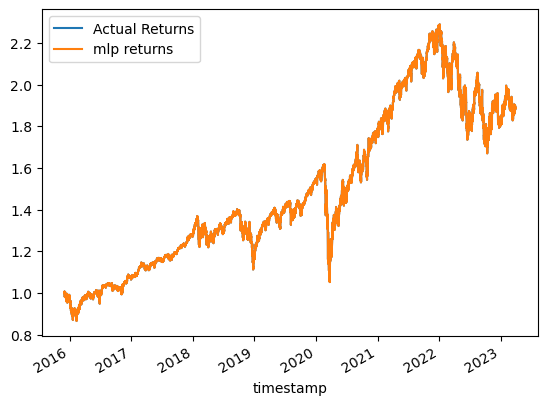

In [22]:
plot=(1+historical_data_copy[['Actual Returns','mlp returns']]).cumprod().plot()
